In [9]:
import cv2
import random
import os
from pathlib import Path

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose,Rotate,CenterCrop, Resize,
    #adding & testing below properperties 
    RGBShift,RandomGamma,ElasticTransform,JpegCompression,ShiftScaleRotate,ChannelDropout,ChannelShuffle,InvertImg,ToGray
)


In [10]:
def strong_aug(p=.5):
    return Compose([
        Rotate((-45,45)),
        HorizontalFlip(),
        RGBShift(r_shift_limit=105, g_shift_limit=105, b_shift_limit=105, p=0.5),
        RandomGamma(),
        ElasticTransform(),
        JpegCompression(quality_lower=4, quality_upper=100, p=0.5),
        ChannelDropout(),
        ChannelShuffle(),
        ToGray(),
        #InvertImg(p=0.1),
        #ShiftScaleRotate(),
        #Transpose(),
        #CenterCrop(height=240,width=240),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.5,border_mode=cv2.BORDER_REFLECT_101),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(p=0.3),
            RandomBrightnessContrast(brightness_limit=0.25,contrast_limit=0.5),            
        ], p=0.3),
        #Resize(128,128),
        HueSaturationValue(p=0.3),
    ], p=p)

### Windows version

In [3]:
def im_save(aug, image,i,ph,p,fn):
    image = aug(image=image)['image']
    if ph=='train':
        dirName=p.joinpath('train/'+fn.replace('.jpg',''))
        if not os.path.exists(dirName):os.mkdir(dirName)
#         cv2.imwrite(str(dirName)+'\\'+i+'.jpg', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if ph=='valid':
        dirName=p.joinpath('valid/'+fn.replace('.jpg',''))
        if not os.path.exists(dirName):os.mkdir(dirName)
    cv2.imwrite(str(dirName)+'\\'+i+'.jpg', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
aug=strong_aug(p=1+random.random())   
def loop(image,n,ph,p,fn):
    for i in range(1,n):
        global aug
        if random.random()<0.3:aug = strong_aug(p=1+random.random())
        if 0.3<random.random()<0.6:aug = strong_aug(p=2+random.random())
        if random.random()>0.6:aug = strong_aug(p=3+random.random())
        im_save(aug, image,str(i),ph,p,fn)
        
def wrapper(p):
    im_list=[i for i in os.listdir(p) if p.joinpath(i).is_file()]
    if not os.path.exists(p.joinpath('train')):os.mkdir(p.joinpath('train'))
    if not os.path.exists(p.joinpath('valid')):os.mkdir(p.joinpath('valid'))
    for i in im_list:
#         print('step-1',i)
        image = cv2.imread(str(p)+'\\'+i, cv2.IMREAD_COLOR)
#         print('step-2',i)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         print('step-3',i)
        loop(image,51,'train',p,i)
        loop(image,21,'valid',p,i)

## unix version

In [4]:
def im_save(aug, image,i,ph,p,fn):
    image = aug(image=image)['image']
    if ph=='train':
        dirName=p.joinpath('train/'+fn.replace('.jpg',''))
        if not os.path.exists(dirName):os.mkdir(dirName)
#         cv2.imwrite(str(dirName)+'\\'+i+'.jpg', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if ph=='valid':
        dirName=p.joinpath('valid/'+fn.replace('.jpg',''))
        if not os.path.exists(dirName):os.mkdir(dirName)
    cv2.imwrite(str(dirName)+'/'+i+'.jpg', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
aug=strong_aug(p=1+random.random())   
def loop(image,n,ph,p,fn):
    for i in range(1,n):
        global aug
        if random.random()<0.3:aug = strong_aug(p=1+random.random())
        if 0.3<random.random()<0.6:aug = strong_aug(p=2+random.random())
        if random.random()>0.6:aug = strong_aug(p=3+random.random())
        im_save(aug, image,str(i),ph,p,fn)
        
def wrapper(p):
    im_list=[i for i in os.listdir(p) if p.joinpath(i).is_file()]
    if not os.path.exists(p.joinpath('train')):os.mkdir(p.joinpath('train'))
    if not os.path.exists(p.joinpath('valid')):os.mkdir(p.joinpath('valid'))
    for i in im_list:
#         print('step-1',i)
        image = cv2.imread(str(p)+'/'+i, cv2.IMREAD_COLOR)
#         print('step-2',i)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         print('step-3',i)
        loop(image,101,'train',p,i)
#         loop(image,21,'valid',p,i)

In [11]:
p=Path('/mnt/d/img_aug')
wrapper(p)

In [6]:
from matplotlib import pyplot as plt
from IPython.display import display, HTML 

In [7]:
test=cv2.imread(str(p)+'/'+'person_045.bmp', cv2.IMREAD_COLOR)
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)

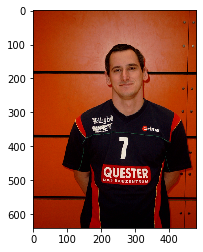

In [8]:
plt.imshow(test)